In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the UNIQUE number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# we also stored data to another df
dupe_mice_df = study_data_complete.loc[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]

dupe_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:

#cleaned_study_data_df = study_data_complete.drop_duplicates(subset=['Mouse ID' ])

dup_mice_filter = study_data_complete["Mouse ID"] == 'g989'

cleaned_study_data_df = study_data_complete.drop(index = study_data_complete[dup_mice_filter].index)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# we already have this stored in dupe_mice_df
dupe_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
# Checking the UNIQUE number of mice.
len(cleaned_study_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_table = cleaned_study_data_df.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

summary_table

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

# First panda bar plot

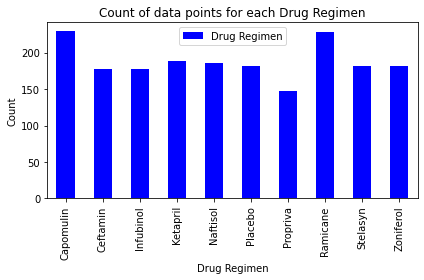

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_group = cleaned_study_data_df.groupby('Drug Regimen')
drug_group
# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())



# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
plt.savefig("PandaBarChart.png")

plt.show()


# Now Matplotlib bar chart

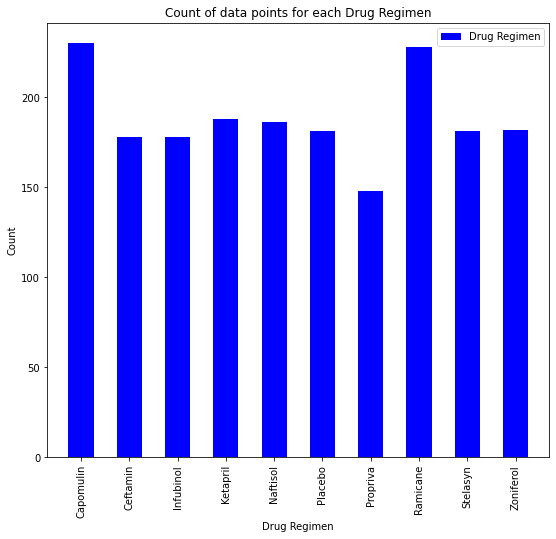

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("PyplotBarChart.png")
plt.show()

In [12]:
# First create a dataframe grouping by the 'Sex' column
gender_group = cleaned_study_data_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()

,Sex
Sex,
Female,922
Male,958


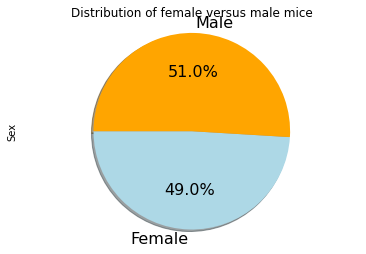

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=180,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.savefig("PandaPieChart.png")
plt.show()
plt.show()

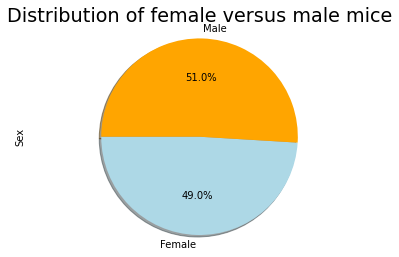

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("PyplotPieChart.png")
plt.show()
plt.show()

## Quartiles, Outliers and Boxplots
Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [15]:
# Create a list of the four drugs to examine
selected_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
selected_drugs = cleaned_study_data_df[cleaned_study_data_df['Drug Regimen'].isin(selected_drug_list)]

# View the newly created subset dataframe
selected_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = selected_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor


Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [17]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [18]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in selected_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [19]:

# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in selected_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

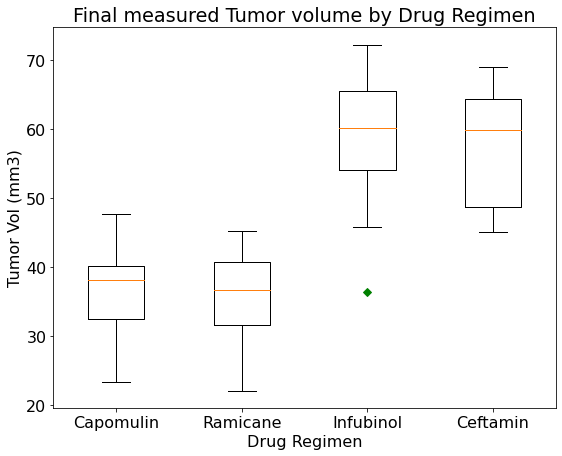

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],selected_drug_list)

# Save the figure
plt.savefig("BoxWhiskerPlot.png")


plt.show()

## Line and Scatter Plots

In [21]:
# Create a dataframe for only the Capomulin data
capomulin_data = cleaned_study_data_df.loc[cleaned_study_data_df['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [22]:
l509_compulin_data = capomulin_data.loc[capomulin_data["Mouse ID"] == 'l509']

l509_compulin_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


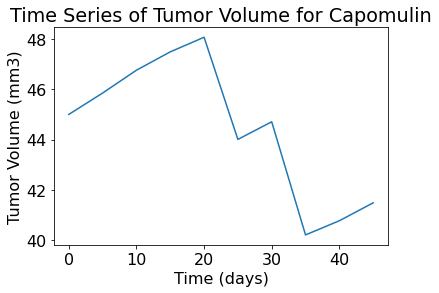

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# get the values for the x axis

plt.plot(
    #l509_compulin_data.index.values,  # X values
     l509_compulin_data['Timepoint'],
    l509_compulin_data['Tumor Volume (mm3)'], # Y values
   # yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    #fmt="bs-", # format line using dashed lines for plot()
    #linewidth=1  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")



# Save the figure
plt.savefig("LineChart2.png")


plt.show()

# Scatter Plot of mouse weight vs. Avg Tumor Volume
Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

In [24]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(10)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22.0,41.964
b742,21.0,40.084
f966,17.0,36.506
g288,19.0,41.990
g316,22.0,44.613
i557,24.0,44.806
i738,20.0,39.141
j119,23.0,44.465
j246,21.0,43.217


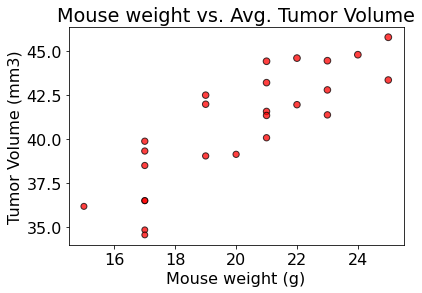

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create scatter plot from the above dataframe
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
plt.savefig("ScatterWeightTumorVol.png")
plt.show()

# Correlation Coefficient and Linear Regression
Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


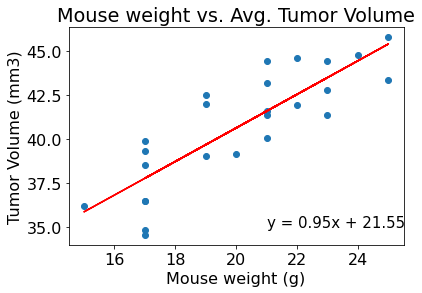

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,35),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
plt.savefig("ScatterWeightTumorVolRegression.png")

plt.show()



## Summary of study results

* The Drug regimen of Capomulin was effective in reducing the average SCC tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely ablated.  
![LineChart2](LineChart2.png)




.

* The number of data points for each Drug Regimen were all above 100 - usually statistical significance is obtained with a sample size of 30 or greater.![BarChart](PandaBarChart.png)

.

* The study had a near identical number of male and female mice. Determining if sex of the mouse was correlated to efficacy would be interesting to look at.![PieChart](PandaPieChart.png)



* Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy.
![LineChart](ScatterWeightTumorVolRegression.png)